In [2]:
import numpy as np
import pandas as pd

# Simple dataset (e.g., house prices in thousands)
data = [120, 125, 128, 122, 126, 124, 600]  # 600 is an outlier
df = pd.DataFrame({'HousePrice': data})

# Mean
mean_value = df['HousePrice'].mean()
print("Mean:", mean_value)

Mean: 192.14285714285714


In [3]:
median_value = df['HousePrice'].median()
print("Median:", median_value)

Median: 125.0


In [5]:
# Adding some categorical data
df['City'] = ['Dhaka', 'Dhaka', 'Chattogram', 'Sylhet', 'Dhaka', 'Rajshahi', 'Chattogram']
mode_value = df['City'].mode()[0]
print("Mode:", mode_value)

Mode: Dhaka


In [5]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

In [6]:
data = [10, 12, 13, 15, 18]
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))

Variance: 7.44
Standard Deviation: 2.727636339397171


In [7]:
import numpy as np
import pandas as pd

# Monthly customer purchase amounts
data = [120, 130, 125, 140, 135, 200, 220]
df = pd.DataFrame({'Purchase': data})

mean = np.mean(df['Purchase'])
pop_var = np.var(df['Purchase'], ddof=0)   # population variance
samp_var = np.var(df['Purchase'], ddof=1)  # sample variance
pop_sd = np.std(df['Purchase'], ddof=0)    # population SD
samp_sd = np.std(df['Purchase'], ddof=1)   # sample SD

print("Mean:", mean)
print("Population Variance:", pop_var)
print("Sample Variance:", samp_var)
print("Population SD:", pop_sd)
print("Sample SD:", samp_sd)
     

Mean: 152.85714285714286
Population Variance: 1370.4081632653058
Sample Variance: 1598.8095238095236
Population SD: 37.019024342428395
Sample SD: 39.98511627855449


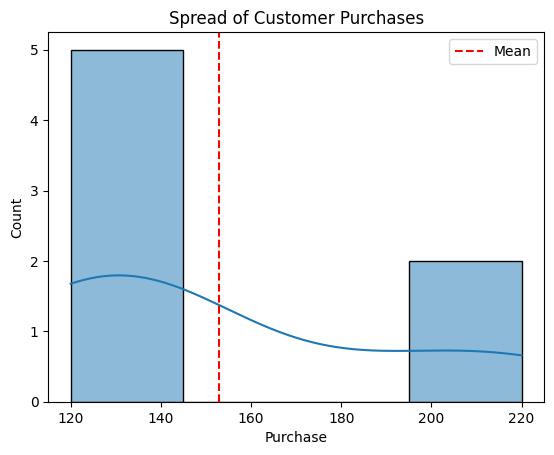

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Purchase'], kde=True)
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.legend()
plt.title('Spread of Customer Purchases')
plt.show()

In [9]:
import numpy as np
data = [10, 12, 13, 15, 18, 21, 23, 25, 28, 30, 34, 35, 37, 40]
print("25th percentile (Q1):", np.percentile(data, 25))
print("50th percentile (Median):", np.percentile(data, 50))
print("75th percentile (Q3):", np.percentile(data, 75))

25th percentile (Q1): 15.75
50th percentile (Median): 24.0
75th percentile (Q3): 33.0


In [10]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR:", IQR)
print("Outlier Range:", lower_bound, "to", upper_bound)

IQR: 17.25
Outlier Range: -10.125 to 58.875


In [11]:
import numpy as np

data = np.array([10, 12, 13, 15, 18, 21, 23, 25, 28, 30, 34, 35, 37, 40])
mean = np.mean(data)
std = np.std(data)

z_scores = [(x - mean) / std for x in data]
print("Z-scores:", np.round(z_scores, 2))
     

Z-scores: [-1.5  -1.29 -1.19 -0.98 -0.66 -0.35 -0.14  0.07  0.38  0.59  1.01  1.11
  1.32  1.63]


In [ ]:
# The value is Skewed so the IQR and Z-score process will not work. For this Modified Z-score is applied.

import pandas as pd
import numpy as np

df = pd.DataFrame({'Income': [22, 25, 27, 29, 35, 40, 42, 100, 110, 115]})

# IQR process -> Didn't worked
Q1 = df['Income'].quantile(0.25)    #25%
Q3 = df['Income'].quantile(0.75)    #75%
IQR = Q3 - Q1

lower = Q1 - 1.0 * IQR
upper = Q3 + 1.0 * IQR
outliers_iqr = df[(df['Income'] < lower) | (df['Income'] > upper)]

print("Outliers using IQR:\n", outliers_iqr)

# Z-score process  -> Didn't worked
mean = df['Income'].mean()
std = df['Income'].std()
df['z_score'] = (df['Income'] - mean) / std
outliers_z = df[np.abs(df['z_score']) > 2.5]
print("Outliers using Z-score:\n", outliers_z)

# Modified Z-score (Robust)  -> Worked
median = df['Income'].median()
mad = np.median(np.abs(df['Income'] - median))
df['mod_z'] = 0.6745 * (df['Income'] - median) / mad
outliers_mz = df[np.abs(df['mod_z']) > 3.5]
print("Outliers using Modified Z-score:\n", outliers_mz)
# MAD = Median of those deviations

Outliers using IQR:
 Empty DataFrame
Columns: [Income]
Index: []
Outliers using Z-score:
 Empty DataFrame
Columns: [Income, z_score]
Index: []
Outliers using Modified Z-score:
    Income   z_score     mod_z
7     100  1.202258  3.665761
8     110  1.466491  4.252283
9     115  1.598607  4.545543
